In [1]:
import pandas as pd

In [2]:
prophecies_dict = {"prophecies": ["[you're going to die]", "[you're going to meet the love of your life, then you'll die]", "did I tell you? You're going to die"], 
                   'name': ["Tarja", "James", "Bruce"]}

prophecies = pd.DataFrame(prophecies_dict)

In [3]:
prophecies.head()

,prophecies,name
0,[you're going to die],Tarja
1,"[you're going to meet the love of your life, t...",James
2,did I tell you? You're going to die,Bruce


In [4]:
prophecies['prophecies'] = prophecies['prophecies'].str.replace("[", "").str.replace("]", "")

<ipython-input-4-759982e1c736>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  prophecies['prophecies'] = prophecies['prophecies'].str.replace("[", "").str.replace("]", "")


In [5]:
prophecies.head()

,prophecies,name
0,you're going to die,Tarja
1,"you're going to meet the love of your life, th...",James
2,did I tell you? You're going to die,Bruce


In [6]:
prophecies_dict2 = {"prophecies": ["you're going to die", "you're going to meet the love of your life, then you'll die", "did I tell you? You're going to die"], 
                   'name': ["Tarja", "James", "Bruce"], 
                   'date': ['1976-01-05', '1985-05-11', '2013-04-04'], 
                   'id': [1,2,3], 
                   'useless_column': ['nobody loves you', "you're stupid", 'moron'],
                   'useful_column_for_later': ['everybody loves the things you do', "you're a genius", 'handsome']}
prophecies2 = pd.DataFrame(prophecies_dict2)

In [7]:
prophecies2.head()

,prophecies,name,date,id,useless_column,useful_column_for_later
0,you're going to die,Tarja,1976-01-05,1,nobody loves you,everybody loves the things you do
1,"you're going to meet the love of your life, th...",James,1985-05-11,2,you're stupid,you're a genius
2,did I tell you? You're going to die,Bruce,2013-04-04,3,moron,handsome


In [8]:
prophecies2.drop(columns=['useless_column'], inplace=True)

In [9]:
prophecies2.head()

,prophecies,name,date,id,useful_column_for_later
0,you're going to die,Tarja,1976-01-05,1,everybody loves the things you do
1,"you're going to meet the love of your life, th...",James,1985-05-11,2,you're a genius
2,did I tell you? You're going to die,Bruce,2013-04-04,3,handsome


In [10]:
column_for_later = prophecies2.pop('useful_column_for_later')

In [11]:
prophecies2.head()

,prophecies,name,date,id
0,you're going to die,Tarja,1976-01-05,1
1,"you're going to meet the love of your life, th...",James,1985-05-11,2
2,did I tell you? You're going to die,Bruce,2013-04-04,3


In [12]:
print(column_for_later)

0    everybody loves the things you do
1                      you're a genius
2                             handsome
Name: useful_column_for_later, dtype: object


In [13]:
prophecies2.dtypes

prophecies    object
name          object
date          object
id             int64
dtype: object

<AxesSubplot:xlabel='date'>

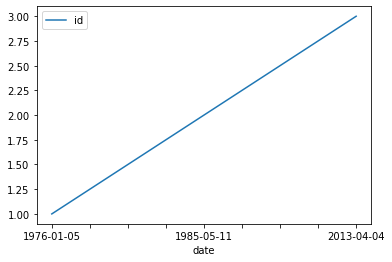

In [14]:
prophecies2.plot('date', 'id')

<AxesSubplot:xlabel='date'>

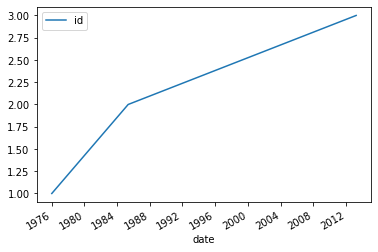

In [15]:
prophecies2['date'] = pd.to_datetime(prophecies2['date'])
prophecies2.plot('date', 'id')

In [16]:
prophecies2.dtypes

prophecies            object
name                  object
date          datetime64[ns]
id                     int64
dtype: object

In [17]:
prophecies_types = pd.Series(data=['dying, loving', 'loving', 'dying'], name='prophecies_types')
prophecies2 = prophecies2.join([prophecies_types, column_for_later])
prophecies2['prophecies_types'] = prophecies2['prophecies_types'].str.split(',')
prophecies2.head()

,prophecies,name,date,id,prophecies_types,useful_column_for_later
0,you're going to die,Tarja,1976-01-05,1,"[dying, loving]",everybody loves the things you do
1,"you're going to meet the love of your life, th...",James,1985-05-11,2,[loving],you're a genius
2,did I tell you? You're going to die,Bruce,2013-04-04,3,[dying],handsome


In [18]:
prophecies2.explode('prophecies_types', ignore_index=True)

,prophecies,name,date,id,prophecies_types,useful_column_for_later
0,you're going to die,Tarja,1976-01-05,1,dying,everybody loves the things you do
1,you're going to die,Tarja,1976-01-05,1,loving,everybody loves the things you do
2,"you're going to meet the love of your life, th...",James,1985-05-11,2,loving,you're a genius
3,did I tell you? You're going to die,Bruce,2013-04-04,3,dying,handsome


In [19]:
prophecies_types_dict = {'Tarja': 'dying, loving', 'James': 'loving', 'Bruce': 'dying'}

prophecies2.drop(columns=['prophecies_types'], inplace=True)

In [20]:
prophecies2['prophecies_types'] = prophecies2['name'].map(prophecies_types_dict)
prophecies2.head()

,prophecies,name,date,id,useful_column_for_later,prophecies_types
0,you're going to die,Tarja,1976-01-05,1,everybody loves the things you do,"dying, loving"
1,"you're going to meet the love of your life, th...",James,1985-05-11,2,you're a genius,loving
2,did I tell you? You're going to die,Bruce,2013-04-04,3,handsome,dying


In [21]:
prophecies_specs_for_merge = pd.DataFrame({'name': ['Tarja', 'Bruce', 'Chuck'], 
                                           'specs': ['something good', 'something bad', 'something']})

prophecies_specs_for_merge.head()

,name,specs
0,Tarja,something good
1,Bruce,something bad
2,Chuck,something


In [22]:
merged_prophecies = prophecies2.merge(prophecies_specs_for_merge, on='name', how='inner')
merged_prophecies.head()

,prophecies,name,date,id,useful_column_for_later,prophecies_types,specs
0,you're going to die,Tarja,1976-01-05,1,everybody loves the things you do,"dying, loving",something good
1,did I tell you? You're going to die,Bruce,2013-04-04,3,handsome,dying,something bad
